## Overfitting

1. jest główną wadą podejścia MLE
2. model próbuje przypisać każdemu elementowi zbioru treningowego prawdopodobieństwo $\dfrac{1}{N}$
  * w przypadku ciągłym przypisuje "nieskończoną" gęstość na "nieskończenie wąskich" przedziałach wokół danych treningowych
3. w modelach dyskryminatywnych
  * dla $\mathbf{x}$ ze zbioru treningowego zapamiętuje etykiety
  * dla pozostałych $\mathbf{x}$ może robić cokolwiek
4. bardzo negatywnie wpływa na skuteczność modelu na nowych danych

### Jak zmierzyć overfitting

1. podział danych treningowych na __zbiór treningowy__ i __zbiór testowy__
  * __konieczne założenie I.I.D.__!
  * podział musi być __losowy__
  * zbiory muszą być __rozłączne__
  * zbiór testowy symuluje nowe dane
  * model nie widzi zbioru testowego, więc nie może tam zoverfittować
  * mierzymy wynik modelu na obu zbiorach
    * podobne wyniki - model mało overfittuje
    * dobre wyniki na zbiorze treningowym i złe na testowym - model overfittuje
    * dobre wyniki na zbiorze testowym i złe na treningowym - bug
  * zazwyczaj zbiór testowy stanowi 1/2, 1/3, 1/5 albo 1/10 wszystkich danych 
    * dużo danych treningowych to mało danych testowych
      * model lepiej się nauczy
      * gorsza estymacja "prawdziwego" wyniku
    * mało danych treningowych to duży danych testowych
      * model gorzej się nauczy
      * lepsza estymacja "prawdziwego" wyniku

2. _cross-validation_
  * drugie bardzo popularne podejście
  * poznamy później na wykładzie

### Jak zapobiec overfittowaniu

Notebook "Regularyzacja".


In [1]:
%matplotlib inline
from src.overfitting import draw_generative, draw_classification, draw_regression

## Model generatywny

negative mean log likelihood (less is better)
true train: 1.422
true test: 1.369
est train: -0.339
est test: 58.708


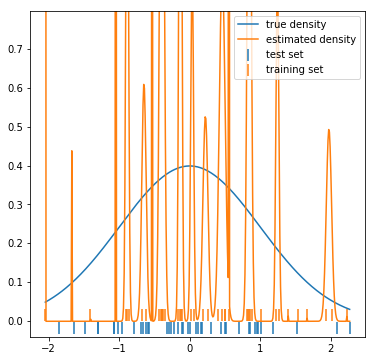

In [2]:
draw_generative(
    loc=0.,
    scale=1.,
    n_samples=43, # PRZETESTOWAĆ INNY ROZMIAR ZBIORU TRENINGOWEGO
    n_components=21 # PRZETESTOWAĆ INNĄ "POJEMNOŚĆ" MODELU
)

## Regresja

mean squared error (less is better)
train: 0.000
test: 1.638


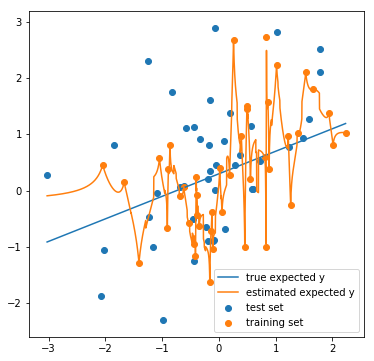

In [3]:
draw_regression(
    x_loc=0,
    x_scale=1.,
    a=.4,
    b=.3,
    n_samples=43,
    n_neighbors=3,
    weights="distance"
)

## Klasyfikacja

negative mean log likelihood (less is better)
true train: 0.480
true test: 0.429
est train: 0.000
est test: 5.141
accuracy (more is better)
train: 1.000
test: 0.628


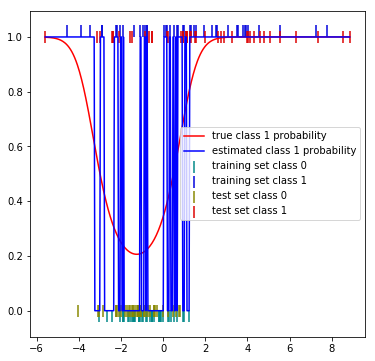

In [4]:
draw_classification(
    loc0=-1.,
    scale0=1.,
    loc1=1.,
    scale1=3.,
    n_samples=43,
    n_neighbors=1,
    weights=None, # "distance"
    epsilon=1e-6, # clip predicted probability to [epsilon, 1-epsilon], ln(0) = -infty
)

negative mean log likelihood (less is better)
true train: 0.357
true test: 0.362
est train: 0.346
est test: 0.405
accuracy (more is better)
train: 0.848
test: 0.838


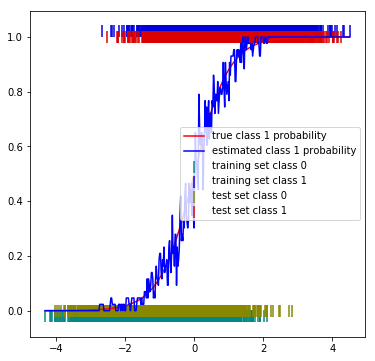

In [5]:
draw_classification(
    loc0=-1., scale0=1., loc1=1., scale1=1.,
    n_samples=4343, n_neighbors=43, weights=None, epsilon=1e-6
)

negative mean log likelihood (less is better)
true train: 0.357
true test: 0.362
est train: 0.000
est test: 3.084
accuracy (more is better)
train: 1.000
test: 0.777


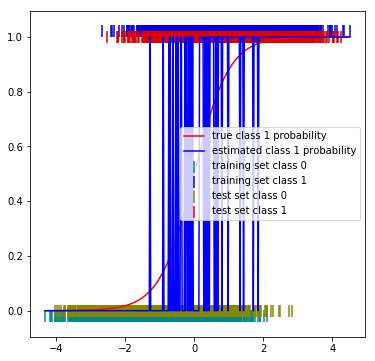

In [6]:
draw_classification(
    loc0=-1., scale0=1., loc1=1., scale1=1.,
    n_samples=4343, n_neighbors=1, weights=None, epsilon=1e-6
)

### Pytanie

Na ostatnim rysunku model wyraźnie overfittuje, a mimo to wciąż ma dość dobre accuracy (punktem odniesienia jest przedostatni rysunek).

Jak to wytłumaczyć?

### Pytanie *

Czy jeśli rozmiar zbioru treningowego dąży do nieskończoności, to accuracy overfittującego klasyfikatora dąży do wartości optymalnej?

Jeśli tak, to dlaczego?

Jeśli nie, to jaka jest granica?